In [1]:
cd /home/jovyan/Documents/dsi_plus/Projects/project_3 - Madelon_feature_selection

/home/jovyan/Documents/dsi_plus/Projects/project_3 - Madelon_feature_selection


In [2]:
%run lib/__init__.py
%matplotlib inline

# Project 3: Madelon Dataset - Feature Selection + Classification

## Step 0 - EDA PostgresDB Madelon Dataset - sample1

### Dataset overview

Extended Madelon dataset of 200,000 records with a 1000 features plus one target column,  available from postgres db hosted on AWS instance 
    - database name = postgres
    - user name = postgtres
    - table name = madelon
    - AWS instance IP =##############
    
Number of variables/features/attributes: 
Real: 20  -  5 of which are informative, 15 of which are linear combinations & are therefore redundant
Probes: 980 
Total: 1000 

The 15 Redundant features add no addtional information over 5 informtational features, because they are correlated or because they can be obtained by [linear] combination of other features. 

Sample size required for
        * 95% CI  & 1% margin of error
            * 200,000 -> 9,164   =   4.58%
        * 90% CI & 1% margin of error
            * 200,000 -> 6,506    = 3.25%

3 random samples of 4.6% of dataset will be used.

Sample acquisition is performed in a separate Jupyter notebook - '00-EDA-PostgresDB-dataset-Sample-extraction'

### Load Data
* A class called Postgres_data has been created in lib/datasets.py. The class contains the data sources and load instructions. Files are loaded by importing the Madelon_data class from the local dataset library and instantiating a Madelon_dataset object.

In [3]:
postgres=Postgres_data()

In [4]:
X=postgres.load_sample3()
X.shape

(9126, 1001)

### Inital data exploration

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9126 entries, 6388 to 6359
Columns: 1001 entries, feat_000 to target
dtypes: float64(1000), int64(1)
memory usage: 69.8 MB


In [6]:
X.head(3)

,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999,target
_id,,,,,,,,,,,,,,,,,,,,,
6388,-0.083700,-0.672527,-0.228969,0.082192,0.516131,-1.257521,2.580797,-1.837962,0.739959,-1.253062,...,-0.418561,-0.649027,1.741702,-0.314667,1.494723,0.520841,0.973145,1.038457,-0.375411,1
6403,1.088741,-1.494896,1.756233,-0.184675,1.019215,-0.494756,-0.372687,-0.857321,-0.201029,-1.641720,...,-0.083940,-0.090976,1.809062,0.836252,-0.858280,0.565828,-1.377318,-1.489743,0.667713,0
6411,-0.167896,1.067755,-0.087097,-0.803749,0.105918,-0.614602,0.508063,-0.281131,-0.411887,-0.768345,...,-0.521087,0.138321,1.482638,-0.208973,-1.516337,0.951806,-1.835223,-0.172803,0.664695,1


Check for nulls

In [7]:
X.isnull().sum().sum() 

0

In [8]:
y=X.target
y.value_counts()

1    4597
0    4529
Name: target, dtype: int64

In [9]:
X.drop('target',axis=1, inplace=True)

In [10]:
X.head(3)

,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_990,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999
_id,,,,,,,,,,,,,,,,,,,,,
6388,-0.083700,-0.672527,-0.228969,0.082192,0.516131,-1.257521,2.580797,-1.837962,0.739959,-1.253062,...,-1.470493,-0.418561,-0.649027,1.741702,-0.314667,1.494723,0.520841,0.973145,1.038457,-0.375411
6403,1.088741,-1.494896,1.756233,-0.184675,1.019215,-0.494756,-0.372687,-0.857321,-0.201029,-1.641720,...,-0.014440,-0.083940,-0.090976,1.809062,0.836252,-0.858280,0.565828,-1.377318,-1.489743,0.667713
6411,-0.167896,1.067755,-0.087097,-0.803749,0.105918,-0.614602,0.508063,-0.281131,-0.411887,-0.768345,...,0.272521,-0.521087,0.138321,1.482638,-0.208973,-1.516337,0.951806,-1.835223,-0.172803,0.664695


### Explore univariate distributions

Look at data statistics , add skew metric

In [11]:
statsX=X.describe().T
statsX['skew']=X.skew(axis=0, numeric_only=True)

In [12]:
statsX.sort_values('min').head()

,count,mean,std,min,25%,50%,75%,max,skew
feat_341,9126.0,0.022931,2.697080,-12.257414,-1.789805,-0.011881,1.835064,9.501737,0.003935
feat_269,9126.0,0.052464,2.553460,-11.962836,-1.552023,0.042153,1.660922,12.260660,0.026018
feat_701,9126.0,-0.009058,2.446203,-11.302618,-1.562681,-0.019622,1.573403,12.384022,-0.022484
feat_336,9126.0,0.050128,2.260801,-11.119042,-1.412631,0.052153,1.507172,8.556125,-0.041303
feat_724,9126.0,-0.008289,2.473906,-10.395909,-1.634208,0.001372,1.598199,10.879945,0.038076


Look at distribution of feature values

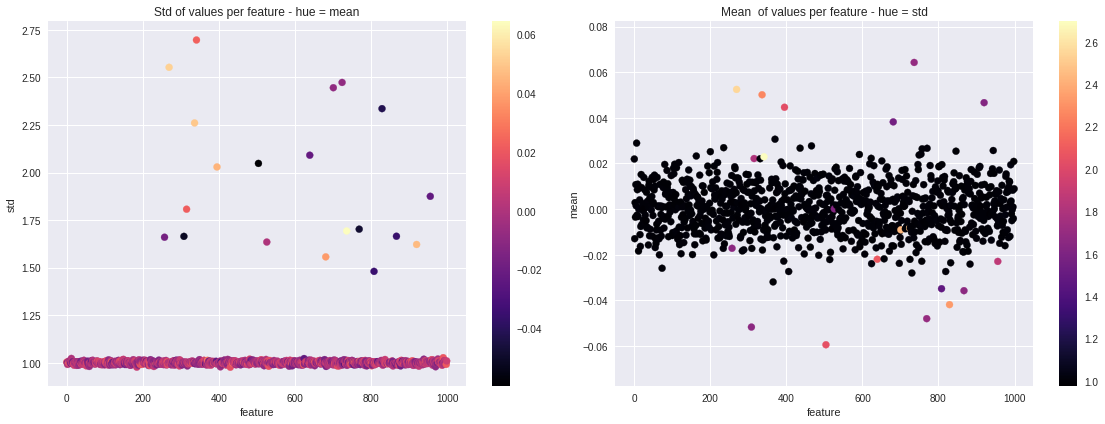

In [13]:
fig=plt.figure(figsize=(16,6))
fig.add_subplot(1,2,1)
plt.scatter(range(1000),X.std() , c=X.mean(), cmap='magma')
plt.title('Std of values per feature - hue = mean')
plt.xlabel('feature')
plt.ylabel('std')
plt.colorbar()
fig.add_subplot(1,2,2)
plt.scatter(range(1000),X.mean() , c=X.std(), cmap='magma')
plt.title('Mean  of values per feature - hue = std')
plt.xlabel('feature')
plt.ylabel('mean')
plt.colorbar()
fig.tight_layout()

In [14]:
f_s=statsX[statsX['std'] > 1.25].index
pd.DataFrame(f_s).to_pickle('./data/pickle_data/sample3_fs')           

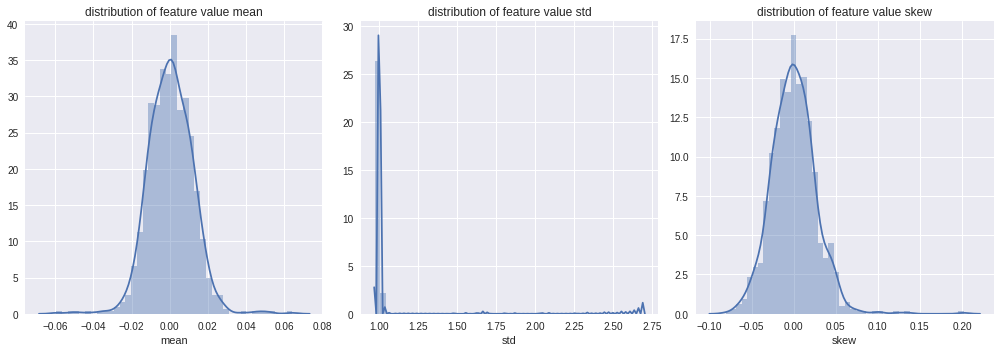

In [15]:
fig=plt.figure(figsize=(14,5))
fig.add_subplot(1,3,1)
sns.distplot(X.mean())
plt.xlabel('mean')
plt.title('distribution of feature value mean')

fig.add_subplot(1,3,2)
sns.distplot(X.std())
plt.xlabel('std')
plt.title('distribution of feature value std')

fig.add_subplot(1,3,3)
sns.distplot(X.skew())
plt.xlabel('skew')
plt.title('distribution of feature value skew')

fig.tight_layout()

### Obersvations :
* 1000 features  - most features have  mean values tightly clusted around 0, and std around 1. There are amsll number of features with etreme mean and std values.
* The level of skew is realtively low for most features but there are some outliers
* target labels that are evenly distributed between classes  1 and -1

Preprocessing should include both scaling and de-skewing of datasets.

### Explore multivariate distributions - between features

With the large no. of features it is difficult to assess or visualize reltionships between features. We can use Prinicpal Component Analysis to explore relationships between the features. PCA idientifes weighted subsets of features that explain the variance within the feature values. For example... 

In [16]:
pca=PCA()
Xp=pca.fit_transform(X)

In [17]:
Xp_df=pd.DataFrame(Xp, columns=['PC'+str(1+i) for i in range(1000)])
Xp_df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC991,PC992,PC993,PC994,PC995,PC996,PC997,PC998,PC999,PC1000
0,-1.498699,-0.941211,6.968929,-1.082615,0.782374,-0.528400,-0.009469,-0.203368,-2.260096,-1.601087,...,2.861959e-15,-2.008820e-15,-2.033796e-15,-8.384366e-16,-1.705622e-15,5.921753e-15,-4.058715e-15,5.068032e-15,-1.902105e-15,-4.074775e-15
1,-3.679303,5.189948,-2.240566,-3.282350,2.358607,-1.665768,2.995192,-0.271136,-0.176592,1.323447,...,-2.682959e-15,-1.556133e-15,2.026566e-15,-4.020805e-17,3.536787e-15,-3.668986e-16,-2.270597e-15,7.108908e-16,7.040920e-16,2.085301e-15
2,-7.402717,-14.620273,6.352969,2.481704,0.211762,1.518874,0.277751,-1.764735,0.994835,0.427485,...,-4.754254e-15,1.049950e-15,1.655792e-15,-5.140805e-15,-2.058368e-15,2.398962e-15,1.640147e-15,-2.929724e-15,-4.526185e-15,7.911080e-16


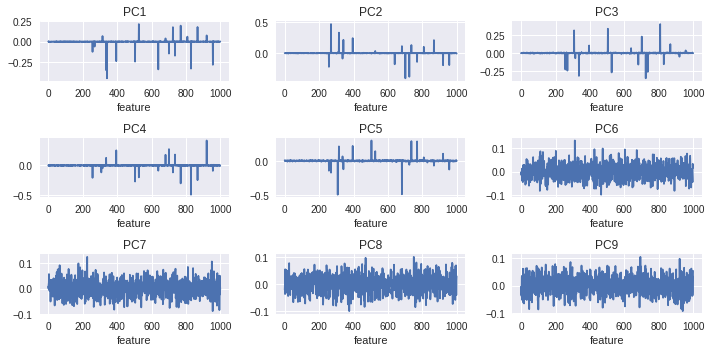

In [18]:
fig=plt.figure(figsize=(10,5))
for i in range(9):
    fig.add_subplot(3,3,1+i)
    plt.plot(pca.components_[i])
    plt.xlabel('feature')
    plt.title('PC'+str(i+1))
    
plt.tight_layout()

In [19]:
Xp_var=pd.DataFrame(pca.explained_variance_ratio_, columns=['var_ratio'])

In [20]:
Xp_var['cum_var']=Xp_var.var_ratio.cumsum()

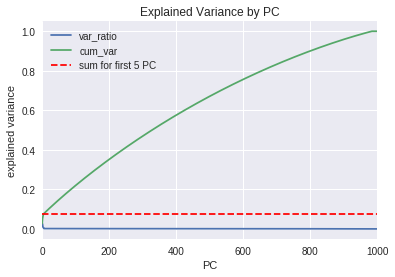

In [21]:
Xp_var.sort_values('var_ratio',ascending=False).plot()
plt.axhline(Xp_var.loc[5,'cum_var'],c='r',ls='--', label='sum for first 5 PC')
plt.ylabel('explained variance')
plt.xlabel('PC')
plt.legend()
plt.title('Explained Variance by PC')

Observing the top 5 principal components there is clearly correlated features present but there is also alot of noise present and top 5 principal components only explain a small amount of the total variance in the feature dataset. 

The feature selection process should remove the noisy features.

### Explore multivariate distributions - between features and target

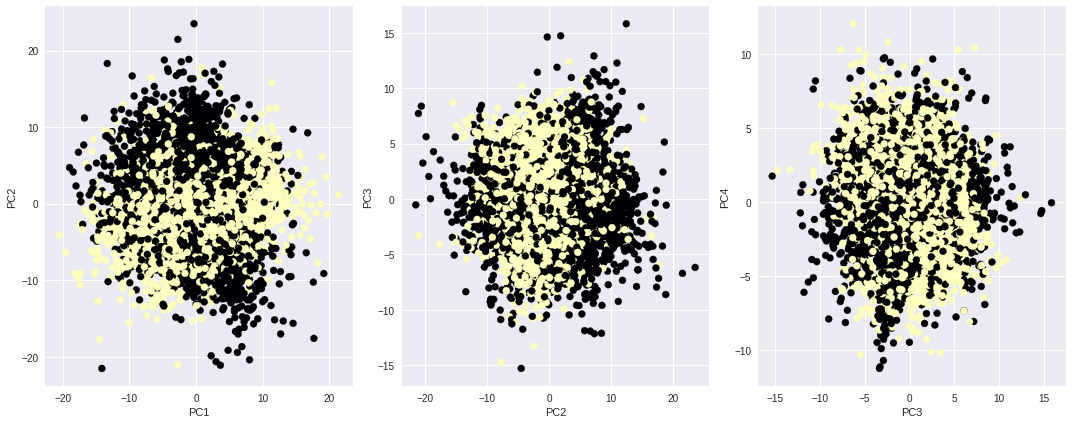

In [22]:
fig=plt.figure(figsize=(15,6))
fig.add_subplot(1,3,1)
plt.scatter(Xp_df.PC1,Xp_df.PC2, c=y, cmap='magma')
plt.xlabel('PC1')
plt.ylabel('PC2')
fig.add_subplot(1,3,2)
plt.scatter(Xp_df.PC2,Xp_df.PC3, c=y, cmap='magma')
plt.xlabel('PC2')
plt.ylabel('PC3')
fig.add_subplot(1,3,3)
plt.scatter(Xp_df.PC3,Xp_df.PC4, c=y, cmap='magma')
plt.xlabel('PC3')
plt.ylabel('PC4')
fig.tight_layout()

Some clustering => PC1 PC2 correlated to target. Difficult to see relationship with the high level of noisy features. Revist after feature selection.

 ### Feature engineering - variable transformation
Use Box-Cox transformation to remove skew from features - add constant =15 to ensure all values >0 optimize Lambda
```
y = (x**lmbda - 1) / lmbda,  for lmbda > 0
    log(x),                  for lmbda = 0
```

In [23]:
from scipy.stats import boxcox

In [24]:
Xbc=pd.DataFrame()
Xbc_l=pd.DataFrame()
for col in X.columns:
    BC_t, lmbda=boxcox((X[col]+15))
    BC_tl=boxcox((X[col]+15) ,lmbda=lmbda)
    Xbc[col]=pd.Series(BC_t)
    Xbc_l[col]=pd.Series(BC_tl)

In [25]:
lmbda

0.89564180100359603

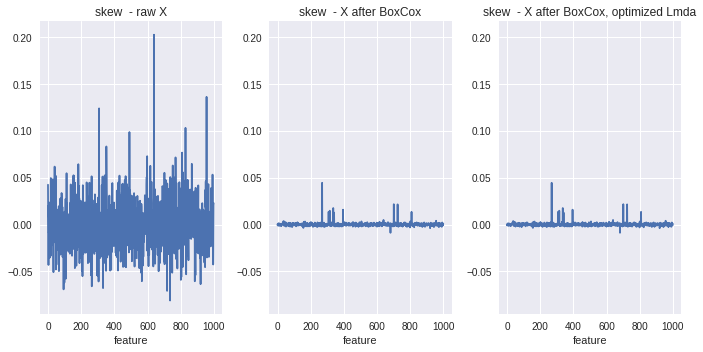

In [26]:
fig=plt.figure(figsize=(10,5))
#fig.add_subplot(1,3,1)
ax1=plt.subplot(131)
plt.plot(list(range(len(X.columns))), X.skew().values)
plt.xlabel('feature')
plt.title('skew  - raw X')
ax2=plt.subplot(132, sharey=ax1)
plt.plot(list(range(len(X.columns))), Xbc.skew().values)
plt.xlabel('feature')
plt.title('skew  - X after BoxCox')
ax2=plt.subplot(133, sharey=ax1)
plt.plot(list(range(len(X.columns))), Xbc_l.skew().values)
plt.xlabel('feature')
plt.title('skew  - X after BoxCox, optimized Lmda')
plt.tight_layout()

### Data past to feature selection process
Pickle the de-skewed X data and the y data for use in feature selection process ( note this has been shifted by a constant of 15 to enable box cox transformation).  Take Xbc with lmda = None so all samples use the same transformation.

In [27]:
Xbc.to_pickle('./data/pickle_data/sample3_X')
y.to_pickle('./data/pickle_data/sample3_y')               

Check pickle data saved correctly

In [28]:
X_check=pd.read_pickle('./data/pickle_data/sample3_X')
y_check=pd.read_pickle('./data/pickle_data/sample3_y')

In [29]:
Xbc.equals(X_check)

True

In [30]:
y.equals(y_check)

True